**IMPORTING LIBRARIES**

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC, NuSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings

**DATASET LOADING & PREPROCESSING**

In [61]:
dataset = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
dataset.shape

(253680, 22)

In [62]:
dataset

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [63]:
dataset.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<Axes: xlabel='BMI', ylabel='HighChol'>

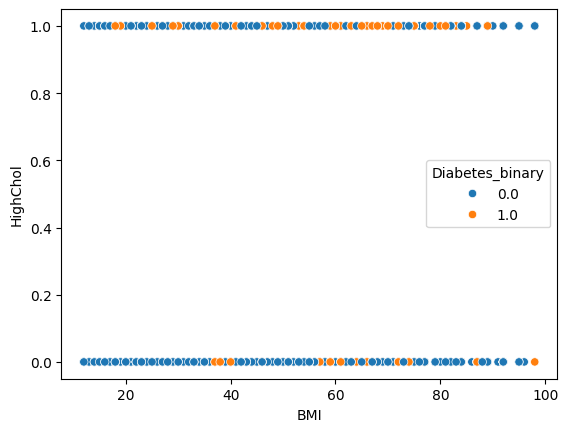

In [64]:
sns.scatterplot(x = 'BMI',y = 'HighChol',hue = 'Diabetes_binary',data = dataset)

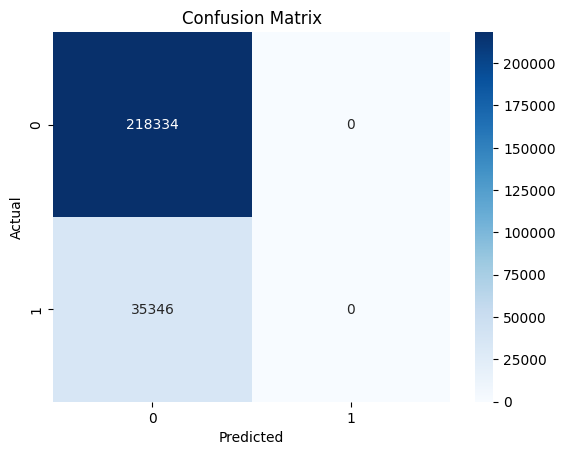

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Fit the model
logreg = LogisticRegression(C=1e5)
X = dataset[['HighChol']]
y = dataset['Diabetes_binary']
logreg.fit(X, y)

#Generate predictions with the model using our X values
y_pred = logreg.predict(X)

#Get the confusion matrix
cf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [66]:
# checking for any missing values

missing_values = dataset.isnull().sum()

if missing_values.any():
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [67]:
# Scaling the dataset

X = dataset.iloc[:,0:-1]
y = dataset['Diabetes_binary']
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.40235504,  1.15368814,  1.16525449, ..., -0.88702088,
         0.31690008, -1.06559465],
       [-0.40235504, -0.86678537, -0.85818163, ..., -0.88702088,
        -0.33793279,  0.96327159],
       [-0.40235504,  1.15368814,  1.16525449, ..., -0.88702088,
         0.31690008, -1.06559465],
       ...,
       [-0.40235504, -0.86678537, -0.85818163, ..., -0.88702088,
        -1.97501498, -0.05116153],
       [-0.40235504,  1.15368814, -0.85818163, ...,  1.12736918,
        -0.33793279, -0.05116153],
       [ 2.48536712,  1.15368814,  1.16525449, ..., -0.88702088,
         0.31690008,  0.96327159]])

**DEFINING SAMPLES & FUNCTION**

In [74]:
random_samples = []
for i in range(10):
    random_samples.append(dataset.sample(n = 4000,replace = False))
random_samples[0].shape

(2500, 22)

In [71]:
def fitnessFunc(k,n,e,data):
    X = data.drop('Diabetes_binary',axis = 1)
    y = data['Diabetes_binary']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    try:
        svm_classifier = NuSVC(kernel = k ,nu = n,tol = e,random_state = 42)
        svm_classifier.fit(X_train,y_train)
        y_pred = svm_classifier.predict(X_test)
        return accuracy_score(y_test,y_pred)
    except:
        return 0

In [73]:
import random as r
acc_convs = []
kernellist = [ 'sigmoid', 'poly', 'rbf', 'linear']
bestEpsilons = []
bestNus = []
bestKernels = []
bestAccuracys = []
for sample in random_samples:
    bestAccuracy = 0
    bestKernel = ''
    bestNu = 0
    bestEpsilon = 0
    acc_conv = []
    for i in range(100):
        k = r.sample(kernellist,1)[0]
        n = r.uniform(0.05,0.23)
        e = r.uniform(0,1)
        accuracy = fitnessFunc(k,n,e,sample)
        acc_conv.append(accuracy)
        if accuracy > bestAccuracy:
            bestAccuracy = accuracy
            bestKernel = k
            bestNu = n
            bestEpsilon = e
    bestEpsilons.append(e)
    bestNus.append(n)
    bestKernels.append(k)
    bestAccuracys.append(bestAccuracy)
    acc_convs.append(acc_conv)

In [77]:
sample_names = ['S{}'.format(i+1) for i in range(10)]
result_df = pd.DataFrame({'Sample': sample_names, 'Best Accuracy': bestAccuracys,
                         'Best nu': bestNus, 'Best Epsilon': bestEpsilons, 'Best Kernel': bestKernels})
result_df

,Sample,Best Accuracy,Best nu,Best Epsilon,Best Kernel
0,S1,0.864167,0.068154,0.403721,sigmoid
1,S2,0.840833,0.215808,0.605428,poly
2,S3,0.857500,0.192606,0.464059,linear
3,S4,0.845833,0.082595,0.585381,poly
4,S5,0.847500,0.122613,0.915229,sigmoid
5,S6,0.851667,0.184496,0.195564,rbf
6,S7,0.835833,0.104674,0.198155,poly
7,S8,0.856667,0.180739,0.576289,poly
8,S9,0.825000,0.164522,0.101596,sigmoid
9,S10,0.864167,0.074310,0.893098,linear


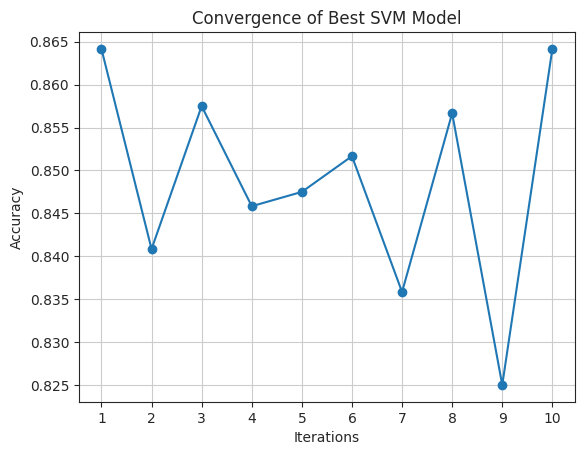

In [82]:
best_model_index = np.argmax(np.array(bestAccuracys))

# Convergence graph corresponding to best svm model
iterations = range(1, len(bestAccuracys) + 1)

# Plot the convergence graph corresponding to the best SVM model
sns.set_style('ticks')
plt.plot(iterations, bestAccuracys, marker='o')  # Plot accuracy values against iterations
plt.title('Convergence of Best SVM Model')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.xticks(iterations)  # Set x-axis ticks to iterations
plt.grid(True)  # Add grid lines for better readability
plt.show()

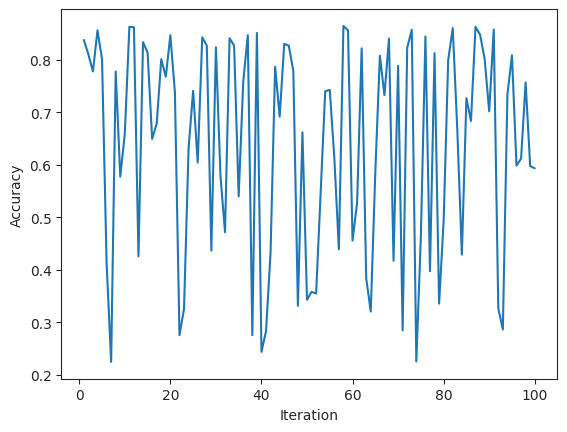

In [83]:
max_index = bestAccuracys.index(max(bestAccuracys))
size = len(acc_convs[max_index])
iteration = [i for i in range(1,size+1)]
sns.lineplot(x = iteration,y = acc_convs[max_index])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()